In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.animation import FuncAnimation

# Set style
sns.set(style="whitegrid")

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=300, n_features=2,n_informative=2, n_redundant=0,n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Train KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

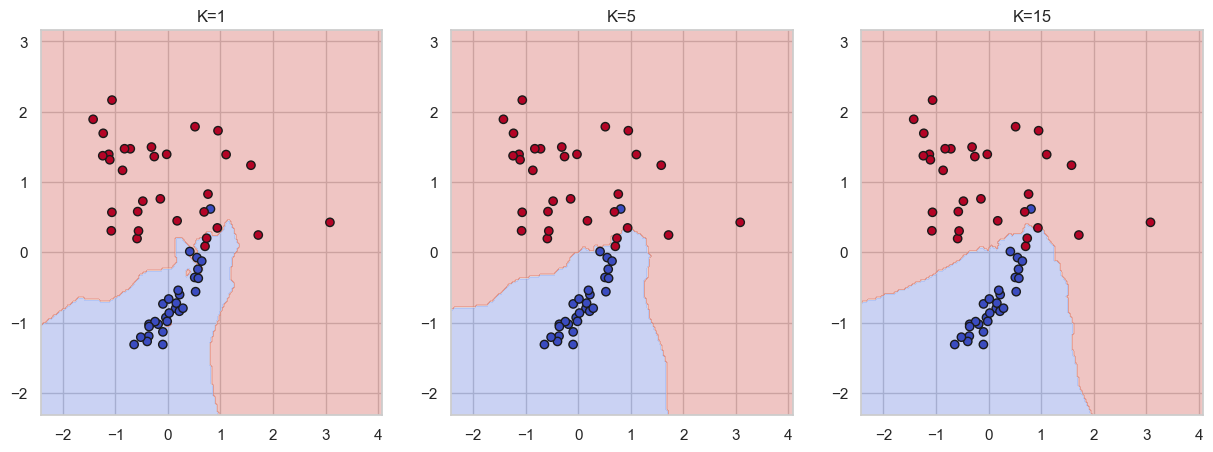

In [4]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    ax.set_title(title)

# Plot with different values of K
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, k in enumerate([1, 5, 15]):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, axes[i], title=f"K={k}")

plt.show()


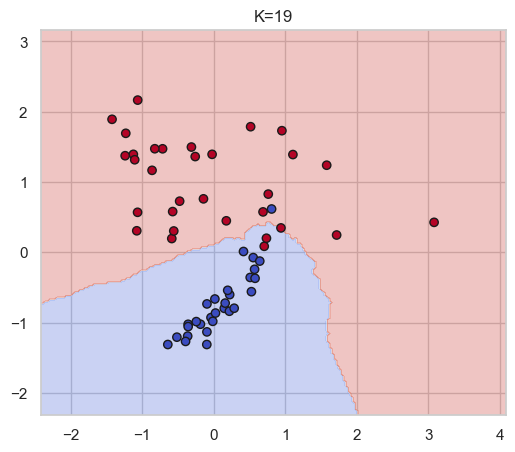

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

def animate(k):
    ax.clear()
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, ax, title=f"K={k}")

ani = FuncAnimation(fig, animate, frames=range(1, 20), interval=500)
ani.save("k-NN animation.gif", writer='pillow', fps=10)
plt.show()
